In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [27]:
base = 'cats_and_dogs'

In [28]:
train_images = os.path.join(base, 'train')
validation_images = os.path.join(base, 'validation')

In [29]:
train_images_cats = os.path.join(train_images, 'cats')
train_images_dogs = os.path.join(train_images, 'dogs')
validation_images_cats = os.path.join(validation_images, 'cats')
validation_images_dogs = os.path.join(validation_images, 'dogs')

In [30]:
num_cats_tr = len(os.listdir(train_images_cats))
num_dogs_tr = len(os.listdir(train_images_dogs))
num_cats_val = len(os.listdir(validation_images_cats))
num_dogs_val = len(os.listdir(validation_images_dogs))

In [31]:
total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

In [32]:
train_images_generator = ImageDataGenerator(rescale=1./255, #rescalar
                                            rotation_range=40, #rotacionar imagem
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2, #cisalhamento
                                            zoom_range=0.2, #zoom
                                            horizontal_flip=True, #inverter horizontalmente
                                            fill_mode='nearest')


validation_images_generator = ImageDataGenerator(rescale=1./255)


In [33]:
BATCH_SIZE = 32
IMG_SHAPE = 200

In [34]:
train_data_gen = train_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=train_images,
                                                            shuffle=True,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

validation_data_gen = train_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=validation_images,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


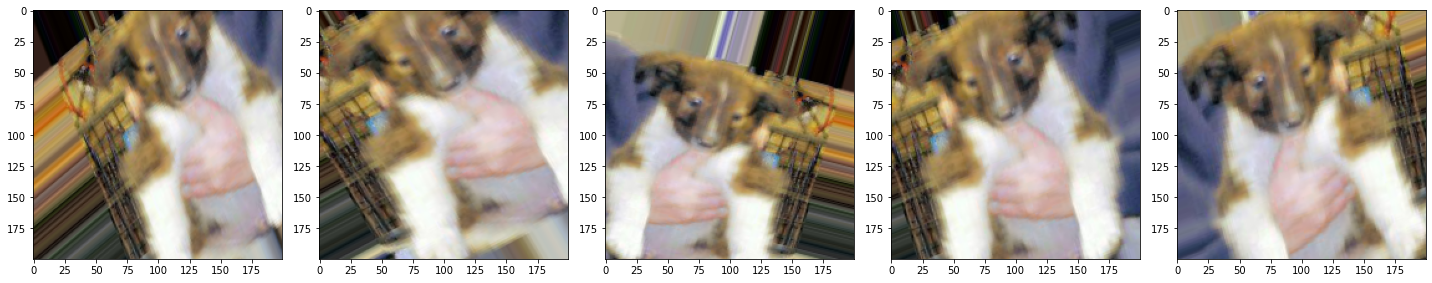

In [35]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

In [36]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
                       
    keras.layers.Dense(2, activation='softmax')
                         
])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)      

In [39]:
EPOCHS = 30

In [40]:
history = model.fit_generator(train_data_gen, 
                              steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=EPOCHS,
                              validation_data=validation_data_gen, 
                              validation_steps = int(np.ceil(total_validation / float(BATCH_SIZE)))
                              )

Epoch 1/30
63/63 [==============================] - 74s 1s/step - loss: 0.7004 - accuracy: 0.4910 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 71s 1s/step - loss: 0.6933 - accuracy: 0.4845 - val_loss: 0.6926 - val_accuracy: 0.5290
Epoch 3/30
63/63 [==============================] - 70s 1s/step - loss: 0.6936 - accuracy: 0.5140 - val_loss: 0.6930 - val_accuracy: 0.5180
Epoch 4/30
63/63 [==============================] - 71s 1s/step - loss: 0.6938 - accuracy: 0.4920 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 72s 1s/step - loss: 0.6906 - accuracy: 0.5275 - val_loss: 0.6829 - val_accuracy: 0.5540
Epoch 6/30
63/63 [==============================] - 71s 1s/step - loss: 0.6916 - accuracy: 0.5240 - val_loss: 0.6814 - val_accuracy: 0.5820
Epoch 7/30
63/63 [==============================] - 73s 1s/step - loss: 0.6870 - accuracy: 0.5540 - val_loss: 0.6872 - val_accuracy: 0.5510
Epoch 8/30
63/63 [==

In [41]:
# analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

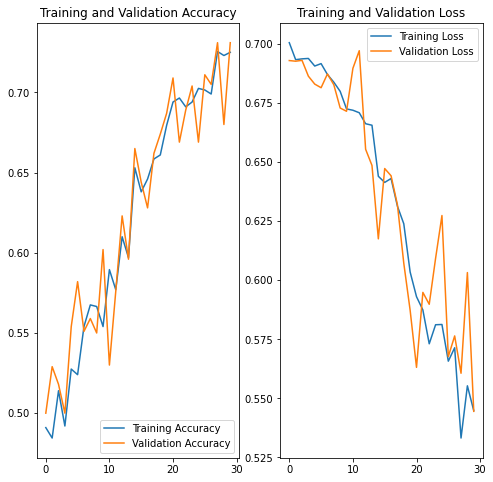

In [42]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [109]:
#fazer predições
test_images = os.path.join(base, 'test')
test_dogs_images = os.path.join(test_images, 'dogs')
test_cats_images = os.path.join(test_images, 'cats')

In [110]:
os.listdir(test_images)

['cats', 'dogs']

In [111]:
contCorretos = 0
for i in os.listdir(test_dogs_images):
    patch_image = os.path.join(test_dogs_images, i)
    test_data_gen = image.load_img(patch_image, target_size=(200,200))
    
    img_array = image.img_to_array(test_data_gen)
    img_batch = np.expand_dims(img_array, axis=0)
    
    img_preprocessed = preprocess_input(img_batch)
    
    prediction = model.predict(img_preprocessed)
    #print(prediction)
    
    if prediction[0][1] == 1.:
        contCorretos += 1

In [112]:
prediction[0][1].dtype

dtype('float32')

In [113]:
acertos = contCorretos/len(os.listdir(test_dogs_images))
print("Taxa de acerto dos dogs:", acertos)

Taxa de acerto dos dogs: 0.892


In [121]:
len(os.listdir(test_dogs_images))

1000

In [129]:
contCorretosCats = 0
for i in os.listdir(test_cats_images):
    patch_image = os.path.join(test_cats_images, i)
    test_data_gen = image.load_img(patch_image, target_size=(200,200))
    
    img_array = image.img_to_array(test_data_gen)
    img_batch = np.expand_dims(img_array, axis=0)
    
    img_preprocessed = preprocess_input(img_batch)
    
    prediction = model.predict(img_preprocessed)
    #print(prediction)
    
    if prediction[0][0] == 0.:
        contCorretosCats += 1

In [130]:
acertosCats = contCorretosCats/len(os.listdir(test_cats_images))
print("Taxa de acerto dos cats:", acertosCats)

Taxa de acerto dos cats: 0.791
